# L4 Color Palettes

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Color is a natural encoding regime for additional variables, and is supported by both Matplot and Seaborn.

In [2]:
# load dataset
df = pd.read_csv('../../Data/fuel-econ.csv')

# create transmission type column
df['trans_type'] = df['trans'].apply(lambda x:x.split()[0])

# randomly sample data frame
np.random.seed(42)
sample = np.random.choice(df.shape[0], 200, replace = False)
df_subset = df.loc[sample]

In [3]:
df_subset.shape

(200, 21)

## The seaborn `hue` parameter

We can add color to Seaborn plots several ways. In this lesson, we will use FacetGrid, where we set `hue`.

Remember that in the `sns.map` method, we set the plotting function function and axes variables.

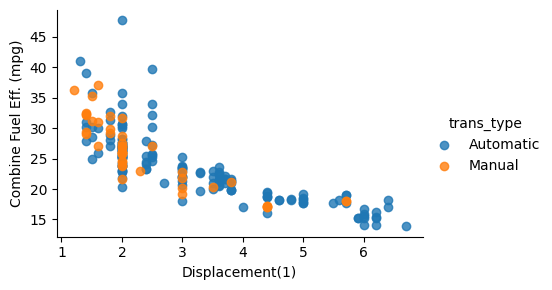

In [4]:
g = sns.FacetGrid(data=df_subset, hue='trans_type',
                hue_order=['Automatic', 'Manual'], aspect=1.5)
g.map(sns.regplot,'displ','comb', fit_reg=False);
g.add_legend()
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');

## Setting a color palette

Now let's look at vehicle class instead. Vehicle class is an ordered variable, so we use a sequential palette instead (viridis_r).

This palette not only goes from light to dark, but it also has a good range of intermediate hues.

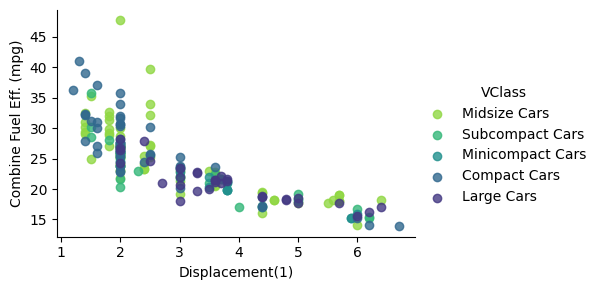

In [5]:
g = sns.FacetGrid(data=df_subset, hue='VClass',
               aspect=1.5, palette='viridis_r')
g.map(sns.regplot,'displ','comb', fit_reg=False);
g.add_legend()
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');

CO2 emissions is a numeric variable, so we shouldn't set it to the `hue` parameter. If we do that, we'll get a messy legend with one color for every unique CO2 value in a rank ordered color scheme.

Instead, just use the basic Matplotlib scatter function to create our plot. We also add a colorbar to provide a sense of scale.

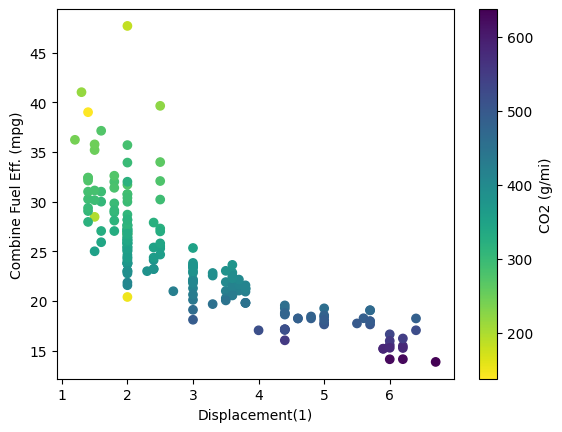

In [6]:
plt.scatter(data=df_subset, x='displ', y='comb', c='co2',
            cmap='viridis_r')
plt.colorbar(label='CO2 (g/mi)')
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');